In [69]:
import pandas as pd
import matplotlib.pyplot as plt # for plotting graphs
import seaborn as sns # for plotting graphs
import datetime as dt

In [70]:
df = pd.read_csv("sales_data_sample.csv")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [71]:
df.columns = [column.capitalize() for column in list(df.columns)]
df.head()

,Ordernumber,Quantityordered,Priceeach,Orderlinenumber,Sales,Orderdate,Status,Qtr_id,Month_id,Year_id,...,Addressline1,Addressline2,City,State,Postalcode,Country,Territory,Contactlastname,Contactfirstname,Dealsize
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


<AxesSubplot:>

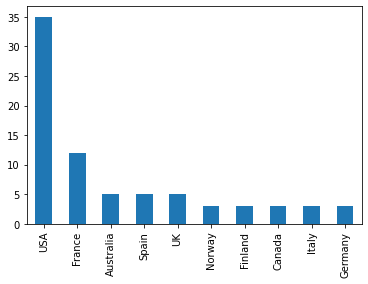

In [72]:
filtered_data=df[['Country','Customername']].drop_duplicates()
filtered_data.Country.value_counts()[:10].plot(kind='bar')

In [73]:
usa_data=df[df.Country=="USA"]
usa_data = usa_data[(usa_data["Status"]=="Shipped")]
usa_data = usa_data[["Customername", "Orderdate", "Ordernumber", "Quantityordered", "Priceeach", "Sales"]]
usa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 2817
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customername     935 non-null    object 
 1   Orderdate        935 non-null    object 
 2   Ordernumber      935 non-null    int64  
 3   Quantityordered  935 non-null    int64  
 4   Priceeach        935 non-null    float64
 5   Sales            935 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 51.1+ KB


In [74]:
cols = list(usa_data.columns)
cols[-1] = "Totalprice"
usa_data.columns = cols
usa_data

,Customername,Orderdate,Ordernumber,Quantityordered,Priceeach,Totalprice
0,Land of Toys Inc.,2/24/2003 0:00,10107,30,95.70,2871.00
3,Toys4GrownUps.com,8/25/2003 0:00,10145,45,83.26,3746.70
4,Corporate Gift Ideas Co.,10/10/2003 0:00,10159,49,100.00,5205.27
5,Technics Stores Inc.,10/28/2003 0:00,10168,36,96.66,3479.76
8,Mini Wheels Co.,12/1/2003 0:00,10201,22,98.57,2168.54
...,...,...,...,...,...,...
2795,The Sharp Gifts Warehouse,4/1/2005 0:00,10400,20,56.12,1122.40
2800,Mini Gifts Distributors Ltd.,8/8/2003 0:00,10142,39,44.23,1724.97
2804,Mini Creations Ltd.,11/14/2003 0:00,10185,28,64.43,1804.04
2807,Collectable Mini Designs Co.,2/19/2004 0:00,10222,36,63.34,2280.24


In [75]:
usa_data['Orderdate'] = pd.to_datetime(usa_data['Orderdate'])
print(usa_data['Orderdate'].min(),usa_data['Orderdate'].max())

2003-01-06 00:00:00 2005-05-05 00:00:00


In [76]:
PRESENT = dt.datetime(2005,5,6)

In [77]:
rfm= usa_data.groupby('Customername').agg({'Orderdate': lambda
date: (PRESENT - date.max()).days, 'Ordernumber': lambda num:
len(num), 'Totalprice': lambda price: price.sum()})

In [78]:
rfm.head()

,Orderdate,Ordernumber,Totalprice
Customername,,,
Auto-Moto Classics Inc.,154,8,26479.26
Boards & Toys Co.,87,3,9129.35
Cambridge Collectables Co.,363,11,36163.62
"Classic Gift Ideas, Inc",204,21,67506.97
Classic Legends Inc.,166,20,77795.20


In [79]:
rfm.columns=["recency", "frequency", "monetary"]
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
Customername,,,
Auto-Moto Classics Inc.,154,8,26479.26
Boards & Toys Co.,87,3,9129.35
Cambridge Collectables Co.,363,11,36163.62
"Classic Gift Ideas, Inc",204,21,67506.97
Classic Legends Inc.,166,20,77795.20


In [80]:
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
Customername,,,,,,
Auto-Moto Classics Inc.,154,8,26479.26,2,4,4
Boards & Toys Co.,87,3,9129.35,1,4,4
Cambridge Collectables Co.,363,11,36163.62,4,4,4
"Classic Gift Ideas, Inc",204,21,67506.97,3,3,3
Classic Legends Inc.,166,20,77795.20,2,3,3


In [81]:
rfm['RFM_Score'] = rfm.r_quartile.astype(str) + rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
Customername,,,,,,,
Auto-Moto Classics Inc.,154,8,26479.26,2,4,4,244
Boards & Toys Co.,87,3,9129.35,1,4,4,144
Cambridge Collectables Co.,363,11,36163.62,4,4,4,444
"Classic Gift Ideas, Inc",204,21,67506.97,3,3,3,333
Classic Legends Inc.,166,20,77795.20,2,3,3,233


In [82]:
best = rfm[rfm['RFM_Score']=='111'].sort_values('monetary',ascending=False)
best

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
Customername,,,,,,,
Mini Gifts Distributors Ltd.,44,178,647596.31,1,1,1,111
Corporate Gift Ideas Co.,72,41,149882.50,1,1,1,111
Technics Stores Inc.,121,34,120783.07,1,1,1,111
Mini Creations Ltd.,119,35,108951.13,1,1,1,111
